<H1> Coronavirus School Closures Data Science Project <H1>

<img src="corona.png" width="800">

<h2>Business Understanding<h2>

Most countries around the world employ a system of school closures in attempt to flatten the Coronavirus infection curve. As reported in September, more than 1 billion students were affected by school closures. The question often arises whether or not this is an affective strategy, I wish to explore this by asking the following questions: 
1. Do open schools exacerbate coronavirus outbreaks?
2. Is there a difference between age groups? 
3. Can the status of a country's school system be used in predicting the severity of a COVID-19 outbreak?

<h2>Data Understanding<h2>

In [3]:
# Import packages
import numpy as np
import pandas as pd

I obtained a dataset of school closure information from Kaggle, and a COVID-19 dataset including daily confirmed cases from Our World in Data

In [4]:
edu = pd.read_csv("covid_impact_education.csv")
cases = pd.read_csv("https://covid.ourworldindata.org/data/owid-covid-data.csv")

<h2>Data Preparation<h2>

Choosing columns I need from the datasets, getting rid of invalid values, changing column names as necessary, and finally merging the datasets

In [6]:
edu = edu[["Date", "Status", "Country"]]
edu.head()

,Date,Status,Country
0,17/02/2020,Partially open,China
1,17/02/2020,Closed due to COVID-19,Mongolia
2,18/02/2020,Partially open,China
3,18/02/2020,Closed due to COVID-19,Mongolia
4,19/02/2020,Partially open,China


In [7]:
edu.isna().sum() # No need to drop invalid values, there are none

Date       0
Status     0
Country    0
dtype: int64

In [8]:
cases = cases.rename(columns = {"location": "Country"})
cases = cases.rename(columns = {"date": "Date"})

In [9]:
cases = cases[["Date", "new_cases", "median_age"]]
cases.head()

,Date,new_cases,median_age
0,2020-03-13,2.0,41.2
1,2020-03-19,NaN,41.2
2,2020-03-20,2.0,41.2
3,2020-03-21,NaN,41.2
4,2020-03-22,NaN,41.2


In [12]:
cases.isna().sum() # No need to drop invalid values, there are none

Date          0
new_cases     0
median_age    0
dtype: int64

In [6]:
cases['Date'] = pd.to_datetime(cases['Date'])
edu['Date'] = pd.to_datetime(edu['Date'])

In [7]:
alldata = cases.merge(edu,left_on=['Date'], right_on=['Date'])
alldata.head()

,Date,new_cases,median_age,Status,Country
0,2020-03-13,2.0,41.2,Partially open,Afghanistan
1,2020-03-13,2.0,41.2,Closed due to COVID-19,Anguilla
2,2020-03-13,2.0,41.2,Closed due to COVID-19,Albania
3,2020-03-13,2.0,41.2,Closed due to COVID-19,United Arab Emirates
4,2020-03-13,2.0,41.2,Closed due to COVID-19,Armenia


In [8]:
alldata.Status = alldata.Status.replace('Closed due to COVID-19', 'COVID Closure')
alldata.Status = alldata.Status.replace('Academic break', 'Break')
alldata.Status = alldata.Status.replace('Partially open', 'Partially Open')
alldata.Status = alldata.Status.replace('Fully open', 'Open')

<h2>Modeling<h2>

I modeled by using a bar plot, then a boxplot. I experimented with many others as well but found that they were not at all informative

In [9]:
# Modeling Packages
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

[Text(0, 0.5, 'Mean COVID positive results'),
 Text(0.5, 0, 'School system status')]

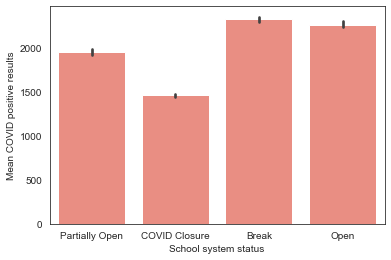

In [10]:
sns.set_style("white")
allbar = sns.barplot(data =alldata, x = "Status", y= "new_cases", color = "salmon")
allbar.set(xlabel="School system status", ylabel = "Mean COVID positive results")

[Text(0, 0.5, 'Median Age'), Text(0.5, 0, 'School system status')]

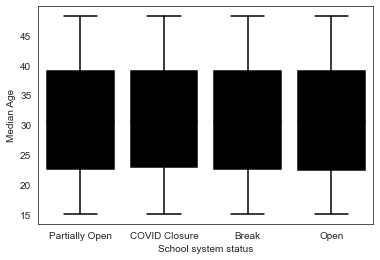

In [11]:
sns.set_style("white")
allbox = sns.boxplot(data =alldata, x = "Status", y= "median_age", color = "black")
allbox.set(xlabel="School system status", ylabel = "Median Age")

<h2>Evaluation<h2>

Here I employed machine learning and assessed the value of the model

In [80]:
edu2 = pd.read_csv("covid_impact_education.csv")
cases2 = pd.read_csv("https://covid.ourworldindata.org/data/owid-covid-data.csv")

In [81]:
edu2 = edu[["Date", "Status", "Country"]]

,Date,Status,Country
0,2020-02-17,Partially open,China
1,2020-02-17,Closed due to COVID-19,Mongolia
2,2020-02-18,Partially open,China
3,2020-02-18,Closed due to COVID-19,Mongolia
4,2020-02-19,Partially open,China
...,...,...,...
41709,2020-09-30,Fully open,Samoa
41710,2020-09-30,Closed due to COVID-19,Yemen
41711,2020-09-30,Fully open,South Africa
41712,2020-09-30,Partially open,Zambia


In [82]:
cases2.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,ABW,North America,Aruba,2020-03-13,2.0,2.0,NaN,NaN,0.0,NaN,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
1,ABW,North America,Aruba,2020-03-19,NaN,NaN,0.286,NaN,NaN,0.0,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
2,ABW,North America,Aruba,2020-03-20,4.0,2.0,0.286,NaN,0.0,0.0,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
3,ABW,North America,Aruba,2020-03-21,NaN,NaN,0.286,NaN,NaN,0.0,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
4,ABW,North America,Aruba,2020-03-22,NaN,NaN,0.286,NaN,NaN,0.0,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN


In [83]:
cases2 = cases2.rename(columns = {"location": "Country"})
cases2 = cases2.rename(columns = {"date": "Date"})

In [84]:
cases2 = cases2[["Date", "new_cases", "median_age", "Country", "new_deaths"]]
cases2.head()

,Date,new_cases,median_age,Country,new_deaths
0,2020-03-13,2.0,41.2,Aruba,0.0
2,2020-03-20,2.0,41.2,Aruba,0.0
6,2020-03-24,8.0,41.2,Aruba,0.0
7,2020-03-25,5.0,41.2,Aruba,0.0
8,2020-03-26,2.0,41.2,Aruba,0.0


In [85]:
cases2['Date'] = pd.to_datetime(cases2['Date'])
edu2['Date'] = pd.to_datetime(edu2['Date'])

In [86]:
alldata2 = cases2.merge(edu2,left_on=['Date','Country'], right_on=['Date','Country'])
alldata2.head(12500)

,Date,new_cases,median_age,Country,new_deaths,Status
0,2020-03-20,2.0,41.2,Aruba,0.0,Closed due to COVID-19
1,2020-03-24,8.0,41.2,Aruba,0.0,Closed due to COVID-19
2,2020-03-25,5.0,41.2,Aruba,0.0,Closed due to COVID-19
3,2020-03-26,2.0,41.2,Aruba,0.0,Closed due to COVID-19
4,2020-03-27,9.0,41.2,Aruba,0.0,Closed due to COVID-19
...,...,...,...,...,...,...
12495,2020-09-13,1501.0,47.9,Italy,6.0,Academic break
12496,2020-09-14,1456.0,47.9,Italy,7.0,Fully open
12497,2020-09-15,1008.0,47.9,Italy,14.0,Fully open
12498,2020-09-16,1229.0,47.9,Italy,9.0,Fully open


In [87]:
alldata2.Status = alldata2.Status.replace('Closed due to COVID-19', 0)
alldata2.Status = alldata2.Status.replace('Academic break', 1)
alldata2.Status = alldata2.Status.replace('Partially open', 2)
alldata2.Status = alldata2.Status.replace('Fully open', 3)

In [88]:
alldata2["Country"] = alldata2["Country"].astype('category')
alldata2["Country"] = alldata2["Country"].cat.codes
alldata2.head(12500)

,Date,new_cases,median_age,Country,new_deaths,Status
0,2020-03-20,2.0,41.2,6,0.0,0
1,2020-03-24,8.0,41.2,6,0.0,0
2,2020-03-25,5.0,41.2,6,0.0,0
3,2020-03-26,2.0,41.2,6,0.0,0
4,2020-03-27,9.0,41.2,6,0.0,0
...,...,...,...,...,...,...
12495,2020-09-13,1501.0,47.9,70,6.0,1
12496,2020-09-14,1456.0,47.9,70,7.0,3
12497,2020-09-15,1008.0,47.9,70,14.0,3
12498,2020-09-16,1229.0,47.9,70,9.0,3


In [89]:
# Data preprocessing
import sklearn
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Machine Learning Algorithms
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor 
from sklearn.neighbors import KNeighborsRegressor

In [130]:
X = np.asarray(alldata2[['Status', 'Country','new_cases']])
y = np.asarray(alldata2['new_deaths'])
from sklearn import preprocessing
X= preprocessing.StandardScaler().fit(X).transform(X)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.35, random_state=4)

In [131]:
"""This function applies training and evaluating to the following models"""
def train_and_evaluate(model,X_train,y_train,X_test,y_test):
    model.fit(X_train,y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    print("Train R-2 Score -> {}".format(r2_score(y_train, y_pred_train)))
    print("Test R-2 Score -> {}".format(r2_score(y_test,y_pred_test)))

In [132]:
lr = LinearRegression(n_jobs=-1)
train_and_evaluate(lr,X_train,y_train,X_test,y_test)

Train R-2 Score -> 0.5374935194298094
Test R-2 Score -> 0.4935863827725091


In [163]:
dtr = DecisionTreeRegressor(max_depth=8,
                            min_samples_split=5,
                           max_leaf_nodes=10,
                            min_samples_leaf=2,
                            random_state=142)
train_and_evaluate(dtr,X_train,y_train,X_test,y_test)

Train R-2 Score -> 0.6927488331943388
Test R-2 Score -> 0.6071118729916973


In [134]:
rf = RandomForestRegressor(max_depth=8,
    min_samples_split=4,
    min_samples_leaf=4,
    random_state=142)
train_and_evaluate(rf,X_train,y_train,X_test,y_test)

Train R-2 Score -> 0.7863303048679607
Test R-2 Score -> 0.6491280886188142


In [160]:
knnreg = KNeighborsRegressor(n_neighbors = 12)
train_and_evaluate(knnreg,X_train,y_train,X_test,y_test)

Train R-2 Score -> 0.7280432198371596
Test R-2 Score -> 0.6641031724594901


In [161]:
from sklearn.model_selection import cross_val_score


regressors = [lr,
             dtr,
             rf,
             knnreg]

df = pd.DataFrame(columns = ['Machine Learning Algorithm', 'Predictive Accuracy'])

for regressor in regressors: 
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    
    s = str(type(regressor)).split('.')[-1][:-2]

    train = regressor.score(X_train, y_train)
    
    test = regressor.score(X_test, y_test)
    
    
    accuracy = cross_val_score(estimator = regressor, X = X_train, y = y_train, cv=10)
    cv = accuracy.mean()*100
    
    r2 = r2_score(y_test, y_pred)
    
    df = df.append({'Machine Learning Algorithm': s, 'Predictive Accuracy': test},
                  ignore_index=True)
df.head()

,Machine Learning Algorithm,Predictive Accuracy
0,LinearRegression,0.493586
1,DecisionTreeRegressor,0.607112
2,RandomForestRegressor,0.649128
3,KNeighborsRegressor,0.664103


<h2>Deployment<h2>

The data and model were deployed in the form of a blog post on the medium website at the following link:
https://medium.com/@maimon.amber/coronavirus-and-schools-what-can-we-learn-from-following-the-data-trail-36d684629a31